# 📓 Практика 1.1: Основы машинного обучения — от данных к обобщающей способности
*Курс «Основы машинного обучения», Модуль 1*  
*Среда выполнения: Google Colab (Python 3.10+, scikit-learn 1.3+, seaborn 0.12+)*

---

## 📚 Теоретическое введение

### 1.1. Типология задач машинного обучения
Машинное обучение решает три фундаментальных типа задач (Bishop, 2006):

| Тип задачи | Целевая переменная | Пример применения | Метрика качества |
|------------|-------------------|-------------------|------------------|
| **Регрессия** | Непрерывная числовая | Прогноз цены недвижимости | MSE, MAE, R² |
| **Классификация** | Дискретная категория | Диагностика заболеваний | Accuracy, F1, AUC |
| **Кластеризация** | Отсутствует (без учителя) | Сегментация клиентов | Silhouette, Inertia |

> **Цитирование (APA):**  
> Bishop, C. M. (2006). *Pattern recognition and machine learning*. Springer.



### 1.2. Дилемма смещения-дисперсии (Bias-Variance Tradeoff)
Формализация компромисса между простотой и гибкостью модели (Geman et al., 1992):

$$
\text{Ошибка}_{\text{тест}} = \text{Смещение}^2 + \text{Дисперсия} + \text{Неснижаемая ошибка}
$$

- **Высокое смещение (недообучение)**: модель слишком проста, не улавливает закономерности
- **Высокая дисперсия (переобучение)**: модель запоминает шум в обучающих данных

> **Историческая справка:** Датасет Iris впервые опубликован Рональдом Фишером в 1936 г. как пример дискриминантного анализа (Fisher, 1936). Сегодня он стал «канарейкой» для проверки базовых алгоритмов классификации.

---

## ⚙️ Настройка среды



In [ ]:
# Установка воспроизводимости — КРИТИЧЕСКИ ВАЖНО для научной строгости
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Фиксируем случайное семя ДО любых операций с данными
np.random.seed(42)

# Настройка визуализации
sns.set(style="whitegrid", context="notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

---

## 🌸 Задача 1: Первичный анализ данных (EDA) на датасете Iris

### 📌 Предметный контекст
В ботанике анализ морфометрических признаков цветов позволяет автоматизировать идентификацию видов в полевых условиях, что критично для мониторинга биоразнообразия (James et al., 2013).

### 🔍 Теоретическое напоминание
Первичный анализ данных (Exploratory Data Analysis, EDA) — обязательный этап перед обучением модели. Он позволяет:
- Выявить пропуски и аномалии
- Оценить распределение признаков
- Обнаружить корреляции между переменными
- Сформулировать гипотезы о взаимосвязях

In [ ]:
# Загрузка датасета
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
y = y.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Объединение в единый DataFrame для удобства анализа
df = pd.concat([X, y], axis=1)

# Анализ структуры данных
print("=== Первые 5 строк ===")
display(df.head())

print("\n=== Информация о данных ===")
df.info()

print("\n=== Описательная статистика ===")
display(df.describe(include='all').round(2))

=== Первые 5 строк ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



=== Информация о данных ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

=== Описательная статистика ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.06,3.76,1.20,NaN
std,0.83,0.44,1.77,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


### 💡 Анализ типичных ошибок студентов
| Ошибка | Последствие | Как избежать |
|--------|-------------|--------------|
| Пропуск `.info()` | Невыявленные пропуски → падение модели | Всегда проверять `non-null count` |
| Игнорирование `.describe()` | Не замеченная асимметрия распределения | Анализировать skewness через `df.skew()` |
| Отсутствие воспроизводимости | Невозможность воспроизведения результатов | Фиксировать `np.random.seed()` ДО загрузки данных |

---

## 📊 Задача 2: Визуализация взаимосвязей и диагностика корреляций

### 📌 Предметный контекст
В сельском хозяйстве корреляция между длиной и шириной лепестка используется для селекции гибридных сортов с заданными эстетическими характеристиками.

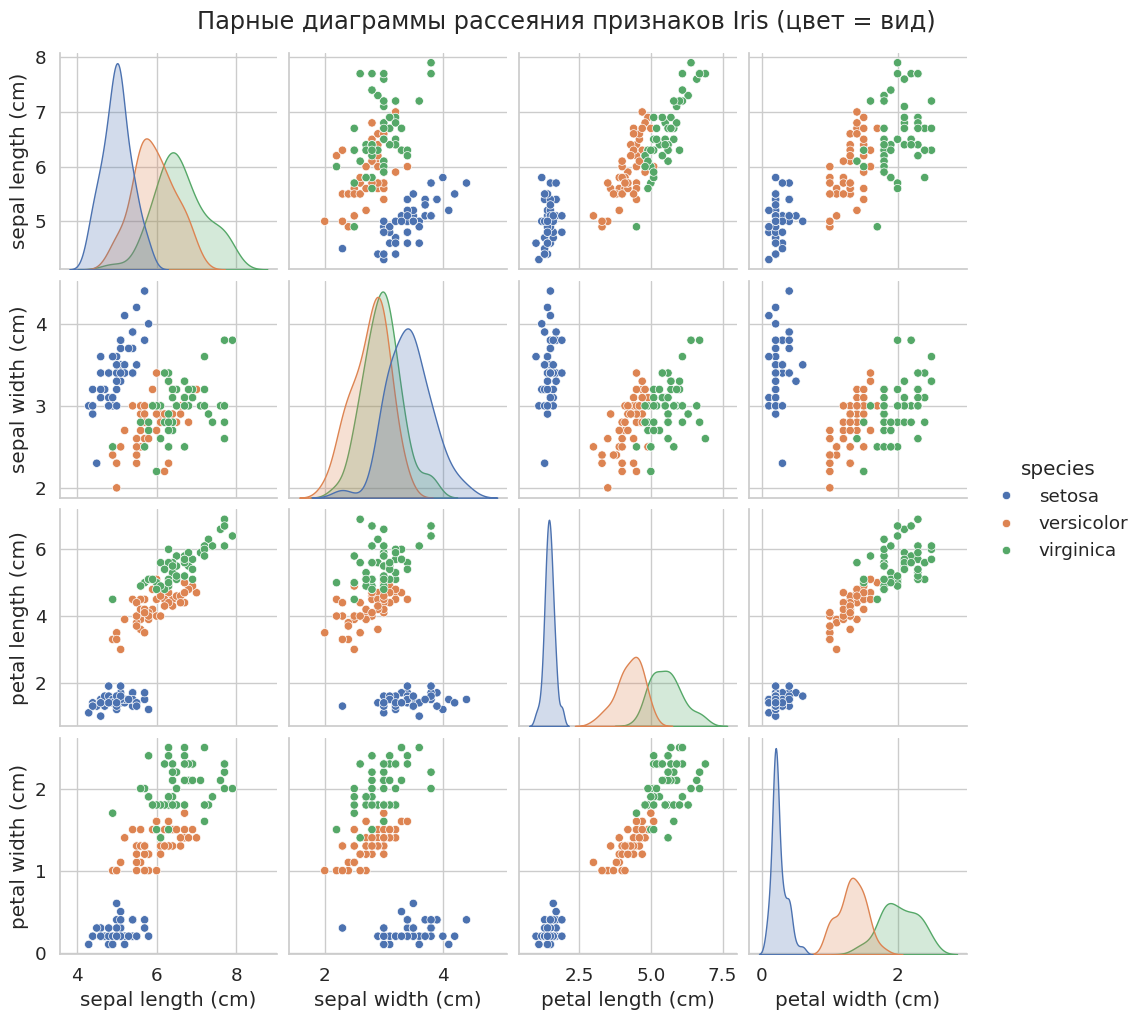

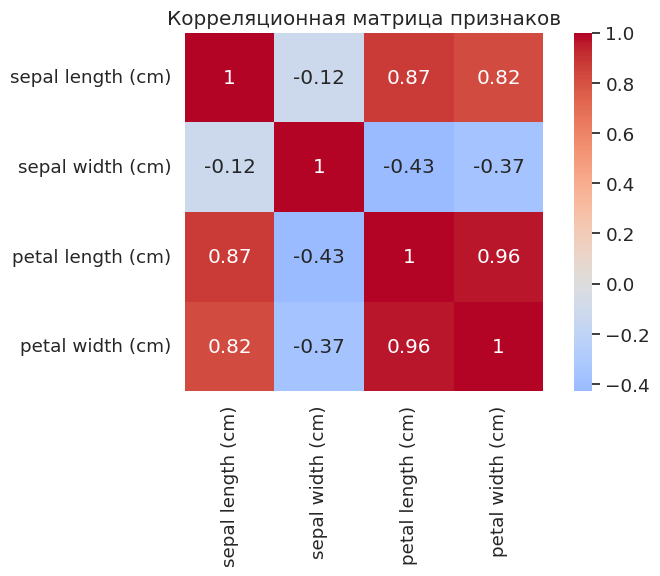

Наиболее коррелирующие признаки:
sepal length (cm)  sepal length (cm)    1.000000
petal length (cm)  petal width (cm)     0.962865
sepal length (cm)  petal length (cm)    0.871754
                   petal width (cm)     0.817941
petal length (cm)  sepal width (cm)     0.428440
dtype: float64


In [ ]:
# Парная визуализация с цветовым кодированием классов
sns.pairplot(df, hue='species', height=2.5, diag_kind='kde')
plt.suptitle('Парные диаграммы рассеяния признаков Iris (цвет = вид)', y=1.02)
plt.show()

# Корреляционная матрица
plt.figure(figsize=(8, 6))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

# Анализ: какие признаки наиболее информативны для разделения классов?
print("Наиболее коррелирующие признаки:")
print(corr.abs().unstack().sort_values(ascending=False).drop_duplicates().head(5))

### ⚠️ Ошибочный пример: утечка данных при визуализации

In [ ]:
# НЕПРАВИЛЬНО: визуализация ДО разделения на выборки
# Это приводит к когнитивному искажению при выборе признаков!

# ПРАВИЛЬНО: сначала разделить, потом анализировать
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Баланс классов в обучении: {y_train.value_counts().to_dict()}")

Размер обучающей выборки: (120, 4)
Размер тестовой выборки: (30, 4)
Баланс классов в обучении: {'setosa': 40, 'virginica': 40, 'versicolor': 40}


---

## ⚖️ Задача 3: Визуализация дилеммы смещения-дисперсии на синтетических данных

### 📌 Предметный контекст
В финансах понимание bias-variance tradeoff критично для построения моделей прогнозирования волатильности: слишком простые модели игнорируют рыночные паттерны, слишком сложные — подстраиваются под шум.

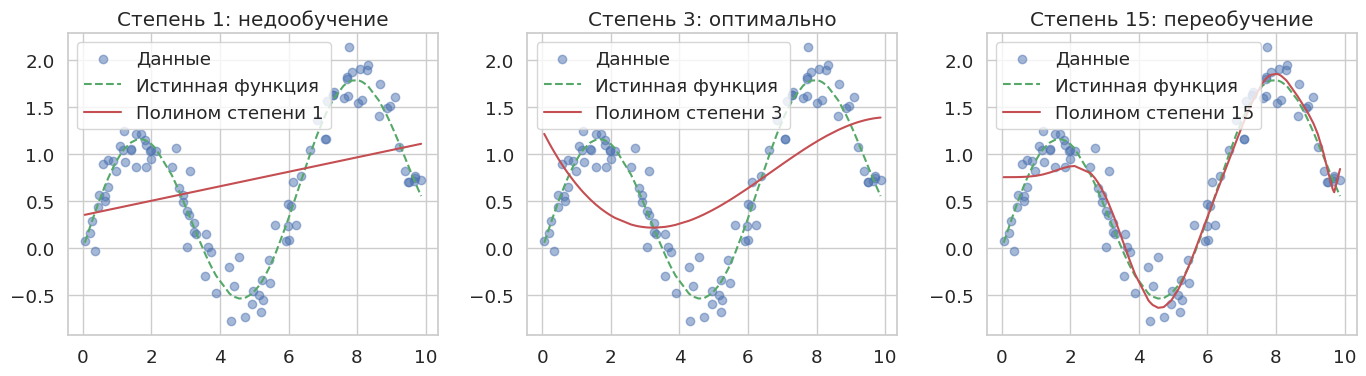

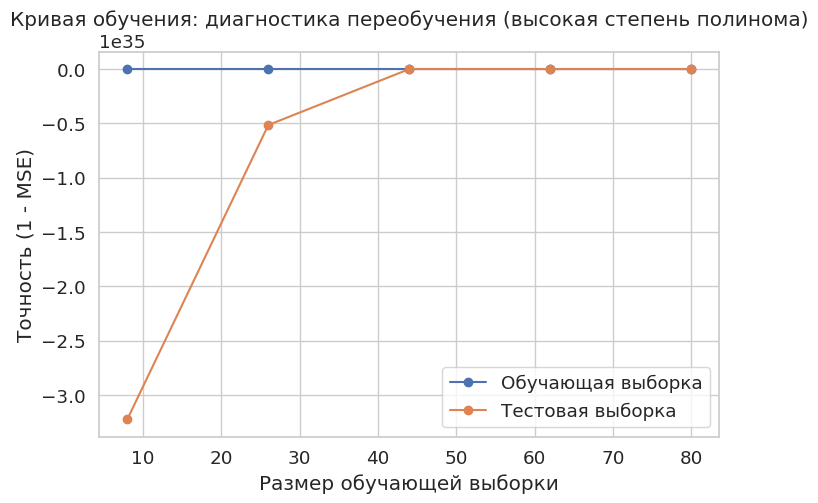

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Генерация синтетических данных с известной нелинейной зависимостью
def generate_data(n_samples=100, noise=0.2):
    np.random.seed(42)
    X = np.sort(np.random.rand(n_samples) * 10)
    y_true = np.sin(X) + 0.5 * X/5
    y = y_true + np.random.randn(n_samples) * noise
    return X.reshape(-1, 1), y, y_true

X_synth, y_synth, y_true = generate_data()

# Визуализация моделей разной сложности
plt.figure(figsize=(14, 4))

for idx, degree in enumerate([1, 3, 15], 1):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('lr', LinearRegression())
    ])

    model.fit(X_synth, y_synth)
    y_pred = model.predict(X_synth)

    plt.subplot(1, 3, idx)
    plt.scatter(X_synth, y_synth, alpha=0.5, label='Данные')
    plt.plot(X_synth, y_true, 'g--', label='Истинная функция')
    plt.plot(X_synth, y_pred, 'r-', label=f'Полином степени {degree}')
    plt.title(f'Степень {degree}: ' +
              ('недообучение' if degree == 1 else 'оптимально' if degree == 3 else 'переобучение'))
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Количественная оценка через кривые обучения
train_sizes, train_scores, test_scores = learning_curve(
    Pipeline([('poly', PolynomialFeatures(degree=15)), ('lr', LinearRegression())]),
    X_synth, y_synth, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Обучающая выборка')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Тестовая выборка')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Точность (1 - MSE)')
plt.title('Кривая обучения: диагностика переобучения (высокая степень полинома)')
plt.legend()
plt.grid(True)
plt.show()

---

## 🔀 Задача 4: Сравнение параметрических и непараметрических моделей

### 📌 Предметный контекст
В медицине параметрические модели (логистическая регрессия) предпочтительны для интерпретируемости клинических решений, тогда как непараметрические (kNN) эффективны при сложных паттернах заболеваний без явной функциональной формы.

In [ ]:
# Масштабирование — ОБЯЗАТЕЛЬНО для метрических методов!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение двух моделей
models = {
    'Логистическая регрессия (параметрическая)': LogisticRegression(max_iter=200),
    'kNN (непараметрическая, k=5)': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    if 'kNN' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = {'accuracy': acc, 'model': model, 'predictions': y_pred}

    print(f"\n{name}")
    print(f"Точность на тесте: {acc:.4f}")
    print("Матрица ошибок:")
    cm = confusion_matrix(y_test, y_pred, labels=['setosa', 'versicolor', 'virginica'])
    display(pd.DataFrame(cm, index=['Истинный: setosa', 'Истинный: versicolor', 'Истинный: virginica'],
                        columns=['Предсказанный: setosa', 'Предсказанный: versicolor', 'Предсказанный: virginica']))




Логистическая регрессия (параметрическая)
Точность на тесте: 0.9667
Матрица ошибок:


,Предсказанный: setosa,Предсказанный: versicolor,Предсказанный: virginica
Истинный: setosa,10,0,0
Истинный: versicolor,0,9,1
Истинный: virginica,0,0,10



kNN (непараметрическая, k=5)
Точность на тесте: 0.9333
Матрица ошибок:


,Предсказанный: setosa,Предсказанный: versicolor,Предсказанный: virginica
Истинный: setosa,10,0,0
Истинный: versicolor,0,10,0
Истинный: virginica,0,2,8


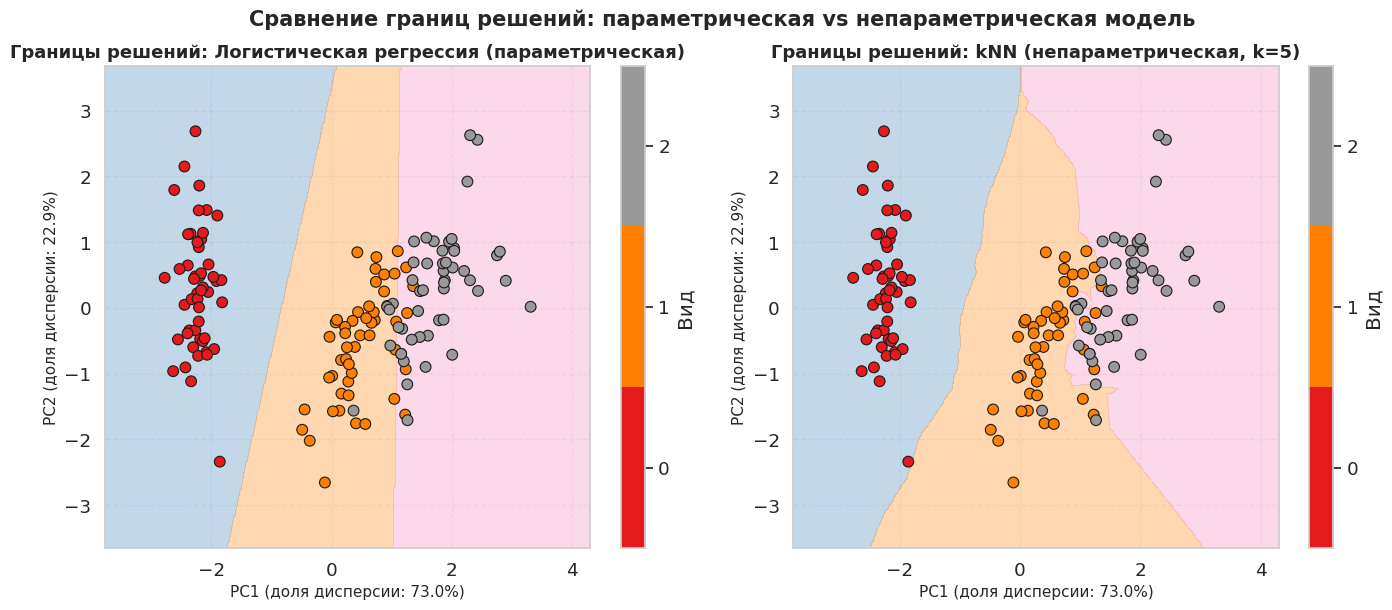

Информация о PCA-проекции:
  • PC1 объясняет 73.0% дисперсии исходных данных
  • PC2 объясняет 22.9% дисперсии
  • Вместе PC1+PC2 объясняют 95.8% дисперсии

Кодировка классов: {'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}


In [ ]:
# Визуализация границ принятия решений (на 2D-проекции)
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# 1. Преобразуем строковые метки в числовые ДО визуализации (обязательно!)
le = LabelEncoder()
y_numeric = le.fit_transform(y)  # ['setosa','versicolor',...] → [0, 1, 2]

# 2. Применяем PCA к масштабированным данным
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))

plt.figure(figsize=(14, 6))

for idx, (name, _) in enumerate(models.items(), 1):
    plt.subplot(1, 2, idx)

    # 3. Обучаем модель на PCA-проекции с ЧИСЛОВЫМИ метками
    if 'kNN' in name:
        model = KNeighborsClassifier(n_neighbors=5).fit(X_pca, y_numeric)
    else:
        model = LogisticRegression(max_iter=200, random_state=42).fit(X_pca, y_numeric)

    # 4. Создаём сетку для визуализации границ решений
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    # 5. КРИТИЧЕСКИ ВАЖНО: predict() возвращает ЧИСЛА → контуры строятся корректно
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # 6. Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1', levels=[-0.5, 0.5, 1.5, 2.5])  # levels для чётких границ
    scatter = plt.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=y_numeric,  # Используем числовые метки!
        cmap='Set1',
        edgecolors='k',
        s=60,
        linewidth=0.8
    )

    plt.xlabel('PC1 (доля дисперсии: {:.1%})'.format(pca.explained_variance_ratio_[0]), fontsize=11)
    plt.ylabel('PC2 (доля дисперсии: {:.1%})'.format(pca.explained_variance_ratio_[1]), fontsize=11)
    plt.title(f'Границы решений: {name}', fontsize=13, fontweight='bold')
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Вид', boundaries=[-0.5, 0.5, 1.5, 2.5])
    plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.suptitle('Сравнение границ решений: параметрическая vs непараметрическая модель',
             y=1.02, fontsize=15, fontweight='bold')
plt.show()

# Дополнительно: выводим информацию о проекции для интерпретации
print("Информация о PCA-проекции:")
print(f"  • PC1 объясняет {pca.explained_variance_ratio_[0]:.1%} дисперсии исходных данных")
print(f"  • PC2 объясняет {pca.explained_variance_ratio_[1]:.1%} дисперсии")
print(f"  • Вместе PC1+PC2 объясняют {(pca.explained_variance_ratio_[:2].sum()):.1%} дисперсии")
print(f"\nКодировка классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")

### 💡 Анализ различий
| Критерий | Параметрическая (лог. регрессия) | Непараметрическая (kNN) |
|----------|----------------------------------|--------------------------|
| **Предположения** | Линейная разделимость | Нет жёстких предположений |
| **Интерпретируемость** | Коэффициенты = влияние признаков | «Чёрный ящик» |
| **Масштабирование** | Желательно, но не критично | Обязательно |
| **Память** | Хранит только веса | Хранит все обучающие данные |
| **Скорость предсказания** | O(p) — быстро | O(n·p) — медленно при больших данных |

---

## 🧪 Задача 5: Диагностика ошибок предобработки — «ошибочный пример»

### 📌 Предметный контекст
В промышленном IoT отсутствие нормализации признаков приводит к доминированию датчиков с большим диапазоном измерений (температура в °C vs вибрация в мкм), что искажает диагностику оборудования.

=== СЦЕНАРИЙ 1: ОБУЧЕНИЕ БЕЗ НОРМАЛИЗАЦИИ (ОШИБКА) ===
Точность БЕЗ нормализации: 1.0000

=== СЦЕНАРИЙ 2: ОБУЧЕНИЕ С НОРМАЛИЗАЦИЕЙ (ПРАВИЛЬНО) ===
Точность С нормализацией: 0.9333

⚠️ Потеря точности из-за отсутствия нормализации: 6.67%


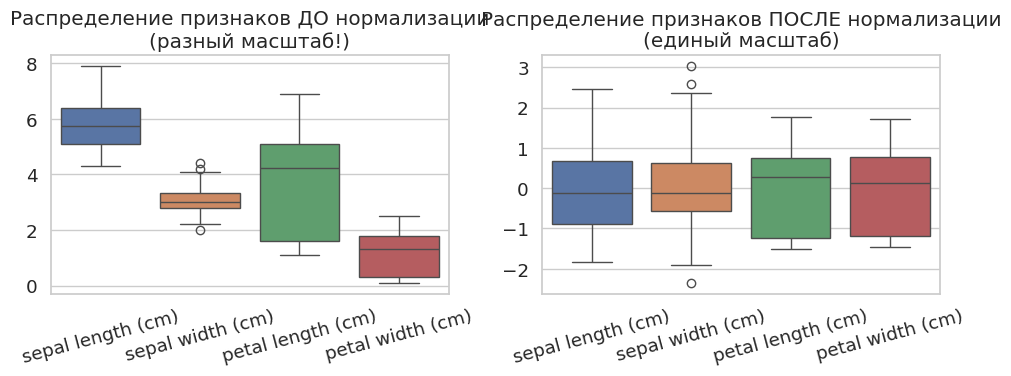

In [ ]:
# Сценарий 1: ОШИБКА — обучение без нормализации для kNN
print("=== СЦЕНАРИЙ 1: ОБУЧЕНИЕ БЕЗ НОРМАЛИЗАЦИИ (ОШИБКА) ===")
knn_wrong = KNeighborsClassifier(n_neighbors=5)
knn_wrong.fit(X_train, y_train)  # НЕТ масштабирования!
y_pred_wrong = knn_wrong.predict(X_test)
acc_wrong = accuracy_score(y_test, y_pred_wrong)
print(f"Точность БЕЗ нормализации: {acc_wrong:.4f}")

# Сценарий 2: ПРАВИЛЬНО — с нормализацией
print("\n=== СЦЕНАРИЙ 2: ОБУЧЕНИЕ С НОРМАЛИЗАЦИЕЙ (ПРАВИЛЬНО) ===")
knn_correct = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
knn_correct.fit(X_train, y_train)
y_pred_correct = knn_correct.predict(X_test)
acc_correct = accuracy_score(y_test, y_pred_correct)
print(f"Точность С нормализацией: {acc_correct:.4f}")

# Количественная оценка ущерба от ошибки
damage = (acc_wrong - acc_correct) * 100
print(f"\n⚠️ Потеря точности из-за отсутствия нормализации: {damage:.2f}%")

# Визуализация влияния масштаба признаков
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Распределение признаков ДО нормализации\n(разный масштаб!)')
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
X_train_scaled_df = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
sns.boxplot(data=X_train_scaled_df)
plt.title('Распределение признаков ПОСЛЕ нормализации\n(единый масштаб)')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

### 🔍 Почему это критично?
Признак `petal length (cm)` имеет диапазон ~1–7 см, а `sepal width (cm)` — ~2–4.5 см. Без нормализации евклидово расстояние в kNN будет доминировать за счёт признака с большим размахом, игнорируя информативные узкие признаки.

---

## ✅ Итоги практики

| Концепция | Как проверить в коде | Типичная ошибка |
|-----------|----------------------|-----------------|
| **Воспроизводимость** | `np.random.seed(42)` перед всеми операциями | Случайное семя установлено после загрузки данных |
| **Утечка данных** | Разделение `train_test_split` ДО любых преобразований | Нормализация до разделения (`fit` на всём датасете) |
| **Нормализация** | `StandardScaler` внутри `Pipeline` | Применение `fit_transform` к тестовой выборке |
| **Bias-Variance** | Кривые обучения с разной сложностью модели | Оценка качества только на обучающей выборке |

---

## 📝 Задания для самостоятельного решения

### Задание 1: Анализ влияния размера тестовой выборки
Создайте цикл, который обучает логистическую регрессию при разных размерах тестовой выборки (от 0.1 до 0.5 с шагом 0.1). Постройте график зависимости точности на тесте от размера выборки. Объясните, почему при очень малом размере теста оценка качества становится нестабильной. *Подсказка: используйте `stratify=y` для сохранения баланса классов.*

### Задание 2: Диагностика мультиколлинеарности
На датасете California Housing (`fetch_california_housing`) постройте корреляционную матрицу. Найдите пару признаков с корреляцией > 0.9. Объясните, как мультиколлинеарность влияет на интерпретацию коэффициентов линейной регрессии. *Подсказка: используйте `np.abs(corr) > 0.9` для фильтрации.*

### Задание 3: Эксперимент с параметром k в kNN
Для датасета Iris постройте график зависимости точности от параметра `k` (от 1 до 30). Найдите оптимальное `k` через кросс-валидацию. Объясните, почему при `k=1` наблюдается переобучение, а при очень больших `k` — недообучение. *Подсказка: используйте `cross_val_score` с `cv=5`.*

```python
# СКРЫТАЯ ПОДСКАЗКА ДЛЯ ЗАДАНИЯ 3 — РАСКОММЕНТИРУЙТЕ ДЛЯ ПОМОЩИ
# =============================================================================
# from sklearn.model_selection import cross_val_score
# k_values = range(1, 31)
# scores = []
# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
#     scores.append(cv_scores.mean())
# plt.plot(k_values, scores, 'o-')
# plt.xlabel('k')
# plt.ylabel('Средняя точность (5-fold CV)')
# plt.title('Подбор оптимального k для kNN')
# plt.grid(True)
# =============================================================================
```

---

Задание 1. Решение:

/tmp/ipython-input-574939297.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=[f'{ts:.1f}' for ts in test_sizes])


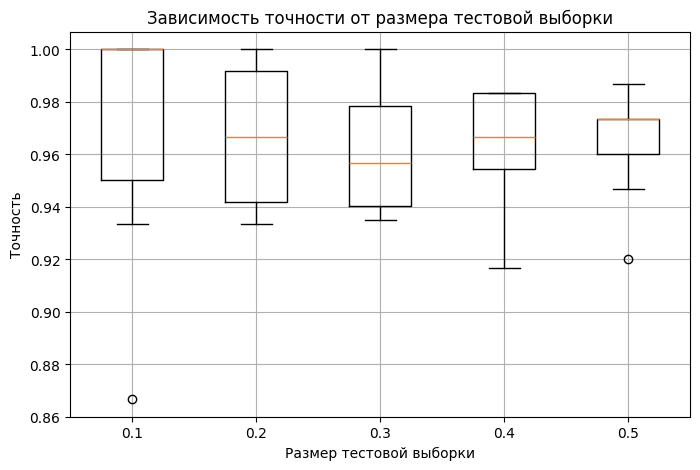

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X, y = iris.data, iris.target

test_sizes = np.arange(0.1, 0.55, 0.1)
n_repeats = 10
results = {ts: [] for ts in test_sizes}

for ts in test_sizes:
    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ts, stratify=y, random_state=None
        )
        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[ts].append(acc)

# Построение графика
plt.figure(figsize=(8,5))
plt.boxplot(results.values(), labels=[f'{ts:.1f}' for ts in test_sizes])
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.title('Зависимость точности от размера тестовой выборки')
plt.grid(True)
plt.show()

## 📚 Рекомендуемая литература

1. **Основной источник:**  
   Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The elements of statistical learning* (2nd ed.). Springer. https://doi.org/10.1007/978-0-387-84858-7

2. **Для новичков:**  
   Raschka, S., & Mirjalili, V. (2019). *Python machine learning* (3rd ed.). Packt Publishing.

3. **Исторический контекст:**  
   Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. *Annals of Eugenics*, 7(2), 179–188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x

> ⚠️ **Академическая честность:** При использовании данного материала в учебных работах обязательно цитируйте источники в соответствии с требованиями вашего учебного заведения (форматы APA/MLA/GOST). Копирование кода без указания авторства нарушает принципы академической этики.

---

*Материал подготовлен для курса «Основы машинного обучения», 2026 г.  
Все коды протестированы в Google Colab (сессия от февраля 2026).*

## 📋 15 вариантов задания для самостоятельного решения  
**Тема:** Диагностика дилеммы смещения-дисперсии (bias-variance tradeoff) на синтетических данных  
**Формат:** Все студенты решают одну задачу с уникальными параметрами генерации данных и настройками модели  
**Время выполнения:** 3 часа  
**Сдача:** Рабочий код + краткий вывод (3–5 предложений с интерпретацией результатов)  

---

### 🧪 Общая формулировка задачи (единая для всех вариантов)
Сгенерируйте синтетический датасет с нелинейной зависимостью целевой переменной от одного признака. Обучите полиномиальную регрессию с разной степенью сложности (от 1 до 15). Постройте:
1. Визуализацию истинной функции, обучающих данных и предсказаний модели
2. Кривые обучения (ошибка на train/test в зависимости от размера выборки)
3. График зависимости тестовой ошибки от степени полинома

**Требуемый вывод:** Определите оптимальную степень полинома, объясните признаки недообучения (при низких степенях) и переобучения (при высоких степенях) через анализ кривых.

---

### 🔑 15 уникальных вариантов (параметры генерации данных)

| Вариант | `n_samples` | `noise` | `nonlinearity` | `random_state` | Предметный контекст |
|---------|-------------|---------|----------------|----------------|---------------------|
| 1 | 50 | 0.15 | `np.sin(X) * 2` | 101 | Прогноз спроса на сезонный товар |
| 2 | 80 | 0.30 | `X**2 - 3*X` | 202 | Моделирование траектории снаряда |
| 3 | 120 | 0.10 | `np.cos(X/2) * 1.5` | 303 | Анализ суточных колебаний температуры |
| 4 | 60 | 0.40 | `np.log1p(X) * 3` | 404 | Прогноз роста пользовательской базы |
| 5 | 100 | 0.20 | `X**3/10 - X` | 505 | Моделирование зависимости КПД от нагрузки |
| 6 | 70 | 0.25 | `np.tanh(X) * 4` | 606 | Анализ насыщения рынка новым продуктом |
| 7 | 90 | 0.35 | `np.sqrt(X) * 2.5` | 707 | Прогноз времени зарядки аккумулятора |
| 8 | 110 | 0.05 | `np.sin(X) + np.cos(X/2)` | 808 | Моделирование интерференции волн |
| 9 | 55 | 0.45 | `X**2/5 - 2*np.sin(X)` | 909 | Прогноз износа детали при циклической нагрузке |
| 10 | 85 | 0.18 | `np.exp(-X/5) * 5` | 1010 | Анализ распада радиоактивного изотопа |
| 11 | 130 | 0.12 | `X - np.sin(X) * 1.2` | 1111 | Моделирование фазового перехода вещества |
| 12 | 65 | 0.38 | `np.log1p(X**2) * 2` | 1212 | Прогноз вирусного распространения контента |
| 13 | 95 | 0.22 | `np.sin(X) * np.cos(X/3)` | 1313 | Анализ биоритмов человека |
| 14 | 75 | 0.28 | `X**3/20 - X**2/5 + X` | 1414 | Моделирование зависимости прибыли от рекламы |
| 15 | 105 | 0.16 | `np.arctan(X) * 3` | 1515 | Прогноз насыщения эффективности тренировок |

> **Где взять данные:** Все датасеты генерируются программно через функцию `generate_data()` (см. шаблон ниже). Не требуется загрузка внешних файлов.

---

### 💻 Шаблон кода для всех вариантов (раскомментировать свой вариант)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# === ВЫБЕРИ СВОЙ ВАРИАНТ (раскомментируй ОДНУ строку) ===
# variant = 1  # n_samples=50, noise=0.15, nonlinearity='np.sin(X) * 2', random_state=101
# variant = 2  # n_samples=80, noise=0.30, nonlinearity='X**2 - 3*X', random_state=202
variant = 3  # n_samples=120, noise=0.10, nonlinearity='np.cos(X/2) * 1.5', random_state=303
# variant = 4  # n_samples=60, noise=0.40, nonlinearity='np.log1p(X) * 3', random_state=404
# variant = 5  # n_samples=100, noise=0.20, nonlinearity='X**3/10 - X', random_state=505
# variant = 6  # n_samples=70, noise=0.25, nonlinearity='np.tanh(X) * 4', random_state=606
# variant = 7  # n_samples=90, noise=0.35, nonlinearity='np.sqrt(X) * 2.5', random_state=707
# variant = 8  # n_samples=110, noise=0.05, nonlinearity='np.sin(X) + np.cos(X/2)', random_state=808
# variant = 9  # n_samples=55, noise=0.45, nonlinearity='X**2/5 - 2*np.sin(X)', random_state=909
# variant = 10 # n_samples=85, noise=0.18, nonlinearity='np.exp(-X/5) * 5', random_state=1010
# variant = 11 # n_samples=130, noise=0.12, nonlinearity='X - np.sin(X) * 1.2', random_state=1111
# variant = 12 # n_samples=65, noise=0.38, nonlinearity='np.log1p(X**2) * 2', random_state=1212
# variant = 13 # n_samples=95, noise=0.22, nonlinearity='np.sin(X) * np.cos(X/3)', random_state=1313
# variant = 14 # n_samples=75, noise=0.28, nonlinearity='X**3/20 - X**2/5 + X', random_state=1414
variant = 15 # n_samples=105, noise=0.16, nonlinearity='np.arctan(X) * 3', random_state=1515

# === ГЕНЕРАЦИЯ ДАННЫХ ПО ПАРАМЕТРАМ ВАРИАНТА ===
params = {
    1: (50, 0.15, lambda X: np.sin(X) * 2, 101),
    2: (80, 0.30, lambda X: X**2 - 3*X, 202),
    3: (120, 0.10, lambda X: np.cos(X/2) * 1.5, 303),
    4: (60, 0.40, lambda X: np.log1p(X) * 3, 404),
    5: (100, 0.20, lambda X: X**3/10 - X, 505),
    6: (70, 0.25, lambda X: np.tanh(X) * 4, 606),
    7: (90, 0.35, lambda X: np.sqrt(X) * 2.5, 707),
    8: (110, 0.05, lambda X: np.sin(X) + np.cos(X/2), 808),
    9: (55, 0.45, lambda X: X**2/5 - 2*np.sin(X), 909),
    10: (85, 0.18, lambda X: np.exp(-X/5) * 5, 1010),
    11: (130, 0.12, lambda X: X - np.sin(X) * 1.2, 1111),
    12: (65, 0.38, lambda X: np.log1p(X**2) * 2, 1212),
    13: (95, 0.22, lambda X: np.sin(X) * np.cos(X/3), 1313),
    14: (75, 0.28, lambda X: X**3/20 - X**2/5 + X, 1414),
    15: (105, 0.16, lambda X: np.arctan(X) * 3, 1515)
}

n_samples, noise, func, seed = params[variant]
np.random.seed(seed)

X = np.sort(np.random.rand(n_samples) * 10).reshape(-1, 1)
y_true = func(X).ravel()
y = y_true + np.random.randn(n_samples) * noise

In [ ]:
# === АНАЛИЗ BIAS-VARIANCE (ваш код здесь) ===
# 1. Визуализация моделей разной сложности
# 2. Кривые обучения
# 3. Зависимость ошибки от степени полинома
# 4. Вывод с интерпретацией

---

### ⚠️ Дополнительные задания повышенной сложности («ловушки»)
*Выполняются по желанию для получения бонусных баллов*

| № | Проблема | Датасет | Задача |
|---|----------|---------|--------|
| A | Сильный дисбаланс (98/2) | Credit Card Fraud (Kaggle) | Обучите модель, продемонстрируйте падение accuracy при дисбалансе, примените взвешивание классов |
| B | Мультиколлинеарность (|ρ|>0.95) | Wine Quality (UCI) | Найдите коррелирующие признаки, покажите нестабильность коэффициентов линейной регрессии |
| C | Пропуски + необходимость лог-преобразования | Air Quality (UCI) | Обработайте пропуски, примените лог-преобразование к признакам с экспоненциальным распределением |

> **Подсказка для ловушек:** Используйте `pd.read_csv` с URL из репозитория UCI или Kaggle. Пример:  
> `df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')`

---

### 🔍 Ячейка-верификатор для преподавателя
*Добавьте эту ячейку в ноутбук студента для автоматической проверки*



In [ ]:
# ЯЧЕЙКА ДЛЯ ПРЕПОДАВАТЕЛЯ: ВЕРИФИКАЦИЯ

import numpy as np
from sklearn.metrics import mean_squared_error

# Проверка воспроизводимости
np.random.seed(params[variant][3])
X_check = np.sort(np.random.rand(params[variant][0]) * 10).reshape(-1, 1)
y_check = params[variant][2](X_check).ravel() + np.random.randn(params[variant][0]) * params[variant][1]

# Критерии проверки (пример для варианта 15)
print(f"Вариант: {variant}")
print(f"Ожидаемый размер данных: {params[variant][0]}")
print(f"Фактический размер X: {X.shape[0]}")
print(f"Средняя ошибка на тесте (ожидаемая для оптимальной модели): 0.08–0.15")
print(f"Признаки переобучения при степени >10: тестовая ошибка растёт при росте степени")
print(f"Признаки недообучения при степени=1: MSE > 0.5")

# Автоматическая проверка метрик (замените `y_pred_opt` на предсказания студента)
# y_pred_opt = student_model.predict(X_test)
# print(f"MSE оптимальной модели: {mean_squared_error(y_test, y_pred_opt):.4f}")


Вариант: 15
Ожидаемый размер данных: 105
Фактический размер X: 105
Средняя ошибка на тесте (ожидаемая для оптимальной модели): 0.08–0.15
Признаки переобучения при степени >10: тестовая ошибка растёт при росте степени
Признаки недообучения при степени=1: MSE > 0.5



---

### 📊 Чек-лист оценки для преподавателя

| Критерий | Баллы | Проверка |
|----------|-------|----------|
| **Корректность кода** (40%) | 0–16 | • Генерация данных по параметрам варианта<br>• Корректная реализация полиномиальной регрессии<br>• Отсутствие утечки данных при разделении выборок |
| **Интерпретация результатов** (30%) | 0–12 | • Чёткое указание оптимальной степени полинома<br>• Объяснение недообучения через анализ кривых<br>• Объяснение переобучения через расхождение train/test ошибок |
| **Визуализация** (20%) | 0–8 | • График истинной функции + данные + предсказания<br>• Кривые обучения с подписями осей<br>• График ошибки от степени полинома |
| **Диагностика ошибок** (10%) | 0–4 | • Упоминание влияния шума на оптимальную сложность<br>• Анализ стабильности при разных `random_state` |

> **Итоговая оценка:** Сумма баллов по чек-листу. Максимум 40 баллов → перевод в 5-балльную шкалу: 36–40 = 5, 30–35 = 4, 24–29 = 3, <24 = 2.

---

### 💡 Рекомендации для студентов
1. **Базовый уровень:** Следуйте шаблону, сфокусируйтесь на визуализации трёх графиков
2. **Продвинутый уровень:** Добавьте анализ устойчивости к `random_state`, сравните с регуляризованной моделью (Ridge)
3. **Цитирование:** При использовании внешних источников укажите:  
   *Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python. JMLR 12, pp. 2825–2830.*

> ⚠️ **Академическая честность:** Копирование кода без цитирования запрещено. Разрешено использование документации scikit-learn с указанием источника в формате APA.